In [266]:
import ast
import json
%run data_plot.ipynb
%run metrics.ipynb
%run discrete_genetic_algorithm.ipynb
%run ant_colony_optimization.ipynb
%run dijkstras_algorithm.ipynb
%run differential_evolution.ipynb
%run particle_swarm_optimization.ipynb

In [267]:
def parse_map_data(results):
    coordinates = {'best_route': {'sensor_id': [],
                              'coordinates': []}, 
               'possible_routes': []
              }
    possible_paths = [ast.literal_eval(paths) for paths in results['possible_paths'].keys()]
    for path in possible_paths:
        route_coords = []
        possible_path_dest_idx = len(path) - 1
        for idx, sensor in enumerate(path):
            if idx != 0 and idx != possible_path_dest_idx:
                route_coords.append(geographic_coords[str(sensor)])
                route_coords.append(geographic_coords[str(sensor)])
            else:
                route_coords.append(geographic_coords[str(sensor)])
        coordinates['possible_routes'].append(route_coords)
    # add best path last so that an visual it appears on top
    best_path = ast.literal_eval(list(results['best_path'].keys())[0])
    best_path_dest_idx = len(best_path) - 1
    for idx, sensor in enumerate(best_path):
        if idx != best_path_dest_idx:
            coordinates['best_route']['sensor_id'].append(sensor)
        if idx != 0 and idx != best_path_dest_idx:
            coordinates['best_route']['coordinates'].append(geographic_coords[str(sensor)])
            coordinates['best_route']['coordinates'].append(geographic_coords[str(sensor)])
        else:
            coordinates['best_route']['coordinates'].append(geographic_coords[str(sensor)])

    return coordinates

In [268]:
def save_solution(solution, method):
    existing_solutions = load_solutions()
    if method in existing_solutions.keys():
        existing_solutions[method][solution[0]['source node']] = solution[0]
    else:
        existing_solutions[method] = {}
        existing_solutions[method][solution[0]['source node']] = solution[0]
        
    json.dump(existing_solutions, open( f"solutions.json", 'w' ) )

    return

In [269]:
def load_solutions():
    with open('solutions.json', 'r') as file:
        try:
            solutions = json.load(file)
        except Exception as e:
            solutions = {}
    return solutions

In [270]:
def find_optimal_route(origin, method, **kwargs):

    if method == "discrete genetic algorithm":
        results, solutions = results, solutions = discrete_genetic_algorithm(origin, **kwargs)
    elif method == "dijkstras algorithm":
        results, solutions = dijkstra_algorithm(origin)
    elif method == "ant colony optimization":
        results, solutions = ant_colony_optimization(origin, **kwargs)
    else:
        return "unknown algorithm"
    save_solution(solutions, method)
    coordinates = parse_map_data(results)
    plot_route(coordinates)

    return

In [271]:
#find_optimal_route(43, 'discrete genetic algorithm', pop_length=100000)
#find_optimal_route(1, 'ant colony optimization')
#find_optimal_route(101, 'dijkstras algorithm')

In [272]:
def run_all():
    methods = ['dijkstras algorithm'] #['discrete genetic algorithm', 'ant colony optimization', 'dijkstras algorithm']
    sensors = list(x_y_data.keys())[:-2]
    for method in methods:
        for sensor in sensors:
            try:
                print(f"Sensor {sensor}")
                find_optimal_route(sensor, method)
            except:
                pass        

    return

In [273]:
#run_all()

In [274]:
def get_algorithm_time_metrics():
    dest_nodes = [x_y_base_station_1[0], x_y_base_station_2[0]]
    start_node = choice(np.array([i for i in x_y_data.keys() if i not in dest_nodes]), 1, replace=False)[0]
    methods = ['discrete genetic algorithm', 'ant colony optimization', 'dijkstras algorithm']
    for method in methods:
        print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
        print(f"executing {method}...")
        start_execution()
        find_optimal_route(start_node, method)
        stop_execution(method)
        print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    plot_algorithm_execution_time()

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
executing discrete genetic algorithm...
**********************************Generation 1**********************************
********************************************Performance**********************************
Chromosome: [143  28  72 151]-----actual route: 143->28->72->151->----Score (end-to-end path cost): 2.667
Chromosome: [143 138  61 151]-----actual route: 143->138->61->151->----Score (end-to-end path cost): 2.667
*****************************************************************************************
**********************************Generation 2**********************************
********************************************Performance**********************************
Chromosome: [143 138 61 151]-----actual route: 143->138->61->151->----Score (end-to-end path cost): 2.667
Chromosome: [143 28 72 151]-----actual route: 143->28->72->151->----Score (end-to-end path cost): 2.667
********************

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
executing ant colony optimization...
ant 1: ({'start_node': 119, 'destination_node': 151, 'paths': [{'path': [119, 74, 111, 118, 15, 64, 17, 44, 41, 134, 40, 92, 32, 139, 65, 151], 'end-to-end_transmission': 0, 'latency': 450, 'cost': 0}, {'path': [119, 30, 148, 6, 116, 3, 150, 138, 118, 13, 151], 'end-to-end_transmission': 0, 'latency': 300, 'cost': 0}, {'path': [119, 125, 124, 136, 45, 37, 75, 59, 127, 58, 142, 95, 10, 7, 65, 150, 25, 101, 26, 30, 97, 120, 81, 5, 129, 151], 'end-to-end_transmission': 0, 'latency': 750, 'cost': 0}, {'path': [119, 30, 35, 58, 148, 10, 85, 98, 67, 75, 48, 11, 40, 15, 141, 38, 43, 108, 26, 17, 33, 125, 79, 113, 87, 44, 95, 24, 151], 'end-to-end_transmission': 0, 'latency': 840, 'cost': 0}, {'path': [119, 141, 70, 104, 50, 55, 128, 116, 152, 69, 132, 60, 133, 97, 89, 146, 36, 4, 14, 61, 4

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
executing dijkstras algorithm...
-------------------------------------------------------------------------------------------------------------------------------------
Optimal route to 151: 143 -> 28 -> 61 -> 145 -> 77 -> 90 -> 53 -> 57 -> 151
Data Transmission Rate: 1 Mbps
Total Latency: 240 ms
Absolute cost: 1.625
Optimal route to 152: 143 -> 7 -> 34 -> 65 -> 102 -> 26 -> 22 -> 33 -> 119 -> 50 -> 69 -> 108 -> 44 -> 99 -> 152
Data Transmission Rate: 1 Mbps
Total Latency: 420 ms
Absolute cost: 1.357


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


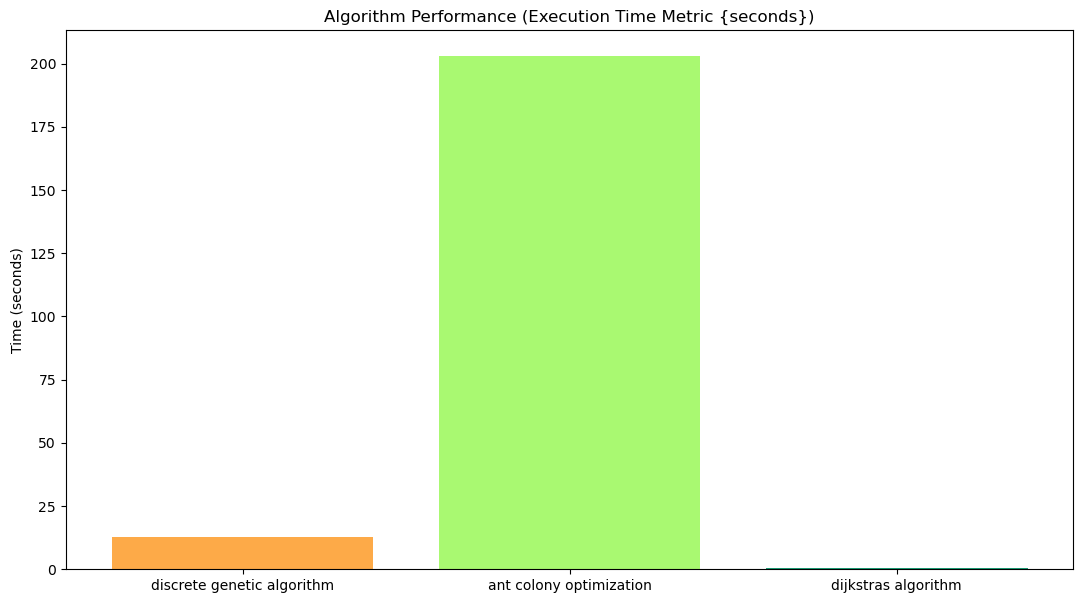

In [275]:
get_algorithm_time_metrics()